In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:

#import openpyxl
customer_base = pd.read_excel('231013_Customer_Base.xlsx')
fraud_cases = pd.read_excel('231013_Fraud_Cases.xlsx')
transactions_input = pd.read_excel('231013_Transactions_Input.xlsx')

In [48]:
customer_base.head()

,customer_id,home_bank,customer_prob
0,10298,bank_E,0.49
1,14507,bank_E,0.35
2,14558,bank_E,0.45
3,13453,bank_E,0.63
4,19629,bank_D,0.79


In [49]:
fraud_cases.head()

,transaction_id,is_scam_transaction,fraud_type,case_id
0,187,1,AdvanceFee,5415844
1,247,1,Impersonation,4280670
2,818,1,Impersonation,6956462
3,891,1,Purchase,2702984
4,1142,1,Purchase,3493741


In [50]:
transactions_input.head()

,transaction_id,description,Amount,category,date,month,customer_id,type,In_or_Out,bank_to,bank_from,transac_prob,description_prob,priority
0,1,Salary Deposit - XYZ Corporation,11474.33021,Income,2023-10-01,October,17699,income,paid_in,bank_A,bank_A,NaN,NaN,3
1,2,Online Retailer - Electronics Purchase,199.99000,Online Shopping,2023-10-01,October,10298,spending,paid_out,bank_A,bank_E,0.78,0.25,3
2,3,Utilities Payment - Internet Service,60.00000,Utilities,2023-10-01,October,10298,spending,paid_out,bank_C,bank_E,0.30,0.22,1
3,4,Rent Payment,1500.00000,Housing,2023-10-01,October,14507,spending,paid_out,bank_D,bank_E,0.57,0.53,3
4,5,Paycheck Deposit - Company Name,10480.68449,Income,2023-10-01,October,14507,income,paid_in,bank_E,bank_D,NaN,NaN,3


In [51]:
df = pd.merge(transactions_input,fraud_cases,how='left',on='transaction_id')
df2 = pd.merge(df,customer_base,how='left',on='customer_id')
df2['total_prob'] = df2['customer_prob'] * df2['description_prob'] * df2['transac_prob']
df2 = df2[df2['In_or_Out']=='paid_out']
df2.head()


,transaction_id,description,Amount,category,date,month,customer_id,type,In_or_Out,bank_to,bank_from,transac_prob,description_prob,priority,is_scam_transaction,fraud_type,case_id,home_bank,customer_prob,total_prob
1,2,Online Retailer - Electronics Purchase,199.99,Online Shopping,2023-10-01,October,10298,spending,paid_out,bank_A,bank_E,0.78,0.25,3,NaN,NaN,NaN,bank_E,0.49,0.095550
2,3,Utilities Payment - Internet Service,60.00,Utilities,2023-10-01,October,10298,spending,paid_out,bank_C,bank_E,0.30,0.22,1,NaN,NaN,NaN,bank_E,0.49,0.032340
3,4,Rent Payment,1500.00,Housing,2023-10-01,October,14507,spending,paid_out,bank_D,bank_E,0.57,0.53,3,NaN,NaN,NaN,bank_E,0.35,0.105735
5,6,Online Retailer - Electronics Purchase,299.99,Online Shopping,2023-10-01,October,14507,spending,paid_out,bank_E,bank_E,0.75,0.65,3,NaN,NaN,NaN,bank_E,0.35,0.170625
6,7,Asos - Online Fashion Shopping,55.00,Shopping,2023-10-01,October,14507,spending,paid_out,bank_B,bank_E,0.37,0.31,1,NaN,NaN,NaN,bank_E,0.35,0.040145


In [52]:
max = df2[df2["is_scam_transaction"] == 1]['customer_prob'].max()
min = df2[df2["is_scam_transaction"] == 1]['customer_prob'].min()
print(f'For the positive scam cases, the minimun probability is {min} and the maximum is {max}')

For the positive scam cases, the minimun probability is 0.4 and the maximum is 0.9


In [53]:
max = df2[df2["is_scam_transaction"].isna()]['customer_prob'].max()
min = df2[df2["is_scam_transaction"].isna()]['customer_prob'].min()
print(f'For the negative scam cases, the minimun probability is {min} and the maximum is {max}')

For the negative scam cases, the minimun probability is 0.2 and the maximum is 0.9


In [54]:
df2[df2["is_scam_transaction"] == 1]['Amount'].count()

2481

In [55]:
(df2[df2["is_scam_transaction"] == 1]['Amount'].count() / df2['transaction_id'].count())*100

0.8389352521877916

In [56]:
df2[df2["is_scam_transaction"] == 1]['Amount'].sum()

253140.4

Try to make a table with clients, number of scams and not scams and compare probability 

In [57]:
df2.groupby(['customer_id']).count()

,transaction_id,description,Amount,category,date,month,type,In_or_Out,bank_to,bank_from,transac_prob,description_prob,priority,is_scam_transaction,fraud_type,case_id,home_bank,customer_prob,total_prob
customer_id,,,,,,,,,,,,,,,,,,,
10003,598,598,598,598,598,598,598,598,482,598,598,598,598,0,0,0,598,598,598
10025,580,580,580,580,580,580,580,580,464,580,580,580,580,0,0,0,580,580,580
10035,577,577,577,577,577,577,577,577,462,577,577,577,577,0,0,0,577,577,577
10067,584,584,584,584,584,584,584,584,469,584,584,584,584,0,0,0,584,584,584
10083,591,591,591,591,591,591,591,591,474,591,591,591,591,0,0,0,591,591,591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900,590,590,590,590,590,590,590,590,476,590,590,590,590,0,0,0,590,590,590
19904,586,586,586,586,586,586,586,586,471,586,586,586,586,0,0,0,586,586,586
19926,585,585,585,585,585,585,585,585,470,585,585,585,585,0,0,0,585,585,585


In [58]:
df3 = df2[['customer_id','transac_prob','description_prob','customer_prob']].groupby(['customer_id']).mean()
df3

,transac_prob,description_prob,customer_prob
customer_id,,,
10003,0.401221,0.407224,0.46
10025,0.402948,0.406017,0.43
10035,0.390052,0.404055,0.40
10067,0.407414,0.393527,0.60
10083,0.410220,0.408832,0.40
...,...,...,...
19900,0.398407,0.405373,0.33
19904,0.405700,0.393396,0.31
19926,0.411111,0.396479,0.54


(array([ 8.,  5.,  8., 22., 44., 54., 63., 75., 78., 48., 30., 28., 13.,
         6.,  3.]),
 array([0.38832203, 0.39022464, 0.39212726, 0.39402987, 0.39593248,
        0.39783509, 0.3997377 , 0.40164031, 0.40354292, 0.40544553,
        0.40734814, 0.40925075, 0.41115337, 0.41305598, 0.41495859,
        0.4168612 ]),
 <BarContainer object of 15 artists>)

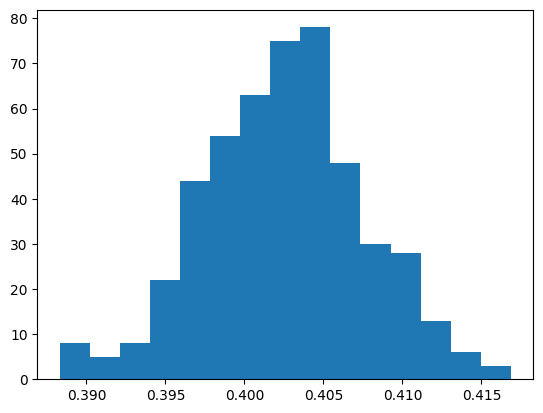

In [59]:
plt.hist(y,bins=15)